# MLX90632 TOR  REPORT

General template info
Authors: CEG

Release: B, July ,2020

Template purpose
This file performs the postcalculation of the TOR data .  It shows the device parameter informatiron vs specifications and lists a go or not go statement according to the agreed quality norms. 

Revisions will be updated in the heading.

In [11]:
#CEG:  General import statements
%reset -f

import os
import glob
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot
from matplotlib import cm
from matplotlib.offsetbox import AnchoredText
import tkinter as tk
from tkinter import filedialog
import seaborn as sns # set plot style
import probscale
import datetime
import time
import json
clear_bkgd = {'axes.facecolor':'none', 'figure.facecolor':'none'}
sns.set(style='ticks', context='talk', color_codes=True, rc=clear_bkgd)


In [17]:
os.chdir("/")
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "combined_csv.csv", index=False, encoding='utf-8-sig')

ValueError: No objects to concatenate

In [13]:
#inputdata = pd.read_csv('tordata', sep=',', na_values=['', "?"])

datafile='1TD15705X2X1_Station2 5S_dm.csv'
#datafile1='1TD18764X2X3_Station1 Top_dm.csv'#inputdata['Datafile'].values[0]
#data_cols = ['station', 'inspection', 'recipe', 'lot', 'partid', 'key', 'value', 'result', 'unit', 'date_created', 'position', 'scanid', 'mintolerance', 'maxtolerance', 'toleranceusage', 'item', 'recipeid','pad_partid','pad_item','measurand_group_name', 'station_unique_id','inspectionstep','basicitemkey']

#CEG:  TOR Data
topdata = pd.read_csv(datafile, sep=',', na_values=['', "?"],  )
#sdata = pd.read_csv(datafile1, sep=',', na_values=['', "?"],  )
topdata.head(3)

,station,inspection,recipe,lot,partid,key,value,result,unit,date_created,...,maxtolerance,toleranceusage,item,recipeid,pad_partid,pad_item,measurand_group_name,station_unique_id,inspectionstep,basicitemkey
0,Station2 5S,Orientation,SFN 3x3 5L,1TD15705X2X1,0,MatchScore,93.73,Pass,Percent,2020-08-08 04:46:40,...,100.0,Low,Pattern 0°Pattern,NaN,NaN,NaN,MatchScore,05412646-1652-4091-82e8-99c2f734a923,Orientation,Pattern
1,Station2 5S,Orientation,SFN 3x3 5L,1TD15705X2X1,1,MatchScore,93.55,Pass,Percent,2020-08-08 04:46:41,...,100.0,Low,Pattern 0°Pattern,NaN,NaN,NaN,MatchScore,05412646-1652-4091-82e8-99c2f734a923,Orientation,Pattern
2,Station2 5S,Orientation,SFN 3x3 5L,1TD15705X2X1,11,MatchScore,98.90,Pass,Percent,2020-08-08 04:49:29,...,100.0,Low,Pattern 0°Pattern,NaN,NaN,NaN,MatchScore,05412646-1652-4091-82e8-99c2f734a923,Orientation,Pattern


In [14]:

    #Yield statistic

now = datetime.datetime.today().strftime('%Y-%m-%d')
when=time.strftime('%H:%M:%S')

insp_parts= len(set(topdata.partid))
topdata[(topdata["result"] != 'Pass')]
failed=topdata[(topdata["result"] != 'Pass')].partid.nunique()
failednum=topdata[(topdata["result"] != 'Pass')].measurand_group_name.unique()



Inspection : Station2 5S
                                                                                 
                                                                                 
Report for lot 1TD15705X2X1
Data generated : 2020-08-25, 14:39:47
Data runned : 2020-08-08 04:46:41
                                                                                 
                                                                                 
Inspected parts = 164
Fails = 162
Top inspection yeld = 0.613
                                                                                 
                                                                                 
   BlobTotalAreaInPercent  Contact Length  Contact Width  Contact Gap1  \
0                     144               7             10             2   

   Contact Pitch  
0              1  


Text(0, 0.5, 'Quantity')

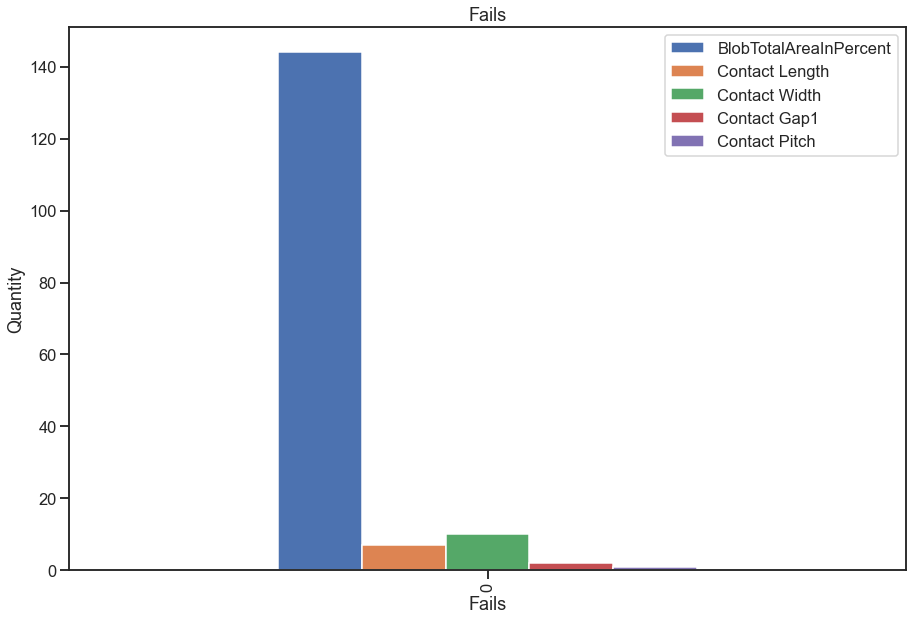

In [15]:
fails={}

for i in failednum :
    fail=topdata[(topdata["result"] != 'Pass')].measurand_group_name.str.count(i).sum()
    fails.update({(i):(fail)})



print('Inspection : ' + topdata.station[1])
print( "                                                                                 ")
print( "                                                                                 ")
print('Report for lot ' + topdata.lot[1] )
print('Data generated : '+ now +', '+ when)
print('Data runned : ' + str (topdata.date_created[1]))
print( "                                                                                 ")
print( "                                                                                 ")

print('Inspected parts = ' +  str(insp_parts ) )
print('Fails = ' +  str(failed ) )

yieldstat= (((insp_parts) - failed)/ (insp_parts + failed))*100
print('Top inspection yeld = '  + str(yieldstat)[0:5])



print( "                                                                                 ")
print( "                                                                                 ")

df = pd.DataFrame(fails, index=[0])
print(df)
df.plot(kind="bar", figsize=(15,10));
pyplot.title("Fails")
pyplot.xlabel("Fails")
pyplot.ylabel("Quantity")




BlobTotalAreaInPercent
count    171.000000
mean       7.989415
std        5.049866
min        0.010000
25%        5.460000
50%        7.190000
75%       10.760000
max       27.440000
Name: value, dtype: float64
                                                                                 


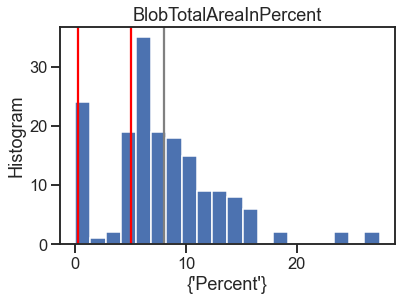

Contact Length
count    810.000000
mean     272.629877
std       11.765017
min      160.900000
25%      271.900000
50%      274.600000
75%      277.175000
max      285.500000
Name: value, dtype: float64
                                                                                 


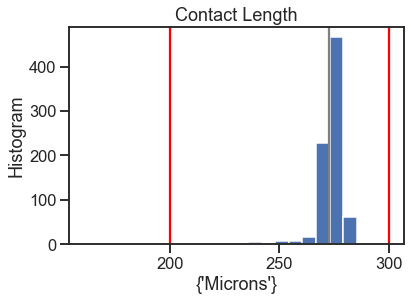

Contact Width
count    810.000000
mean     230.389383
std       10.094896
min      129.200000
25%      229.925000
50%      232.300000
75%      234.000000
max      241.400000
Name: value, dtype: float64
                                                                                 


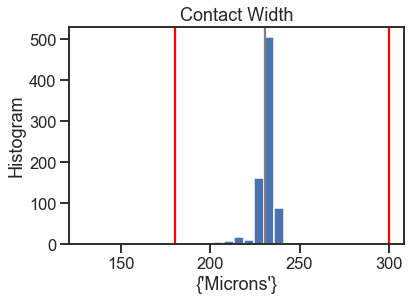

Contact Gap1
count    438.000000
mean     262.316210
std       13.139283
min       71.700000
25%      261.200000
50%      263.250000
75%      265.300000
max      275.300000
Name: value, dtype: float64
                                                                                 


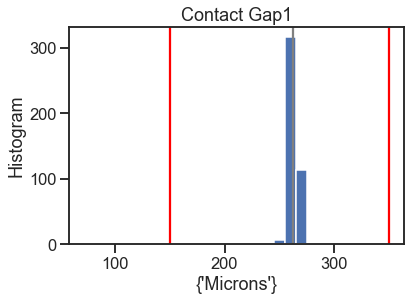

Contact Pitch
count    486.000000
mean     497.715638
std        4.035242
min      488.400000
25%      496.000000
50%      497.500000
75%      498.900000
max      565.000000
Name: value, dtype: float64
                                                                                 


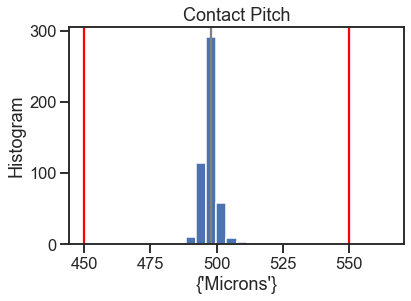

In [16]:
failednum=topdata[(topdata["result"] != 'Pass')].measurand_group_name.unique()

num=()
for ins in failednum :
    num=topdata[(topdata["measurand_group_name"] == ins)]
    print(ins)
    type(num)
    print((num.value.describe()))
    print( "                                                                                 ")
    pyplot.title(ins)
    pyplot.ylabel('Histogram')
    pyplot.xlabel(set(num.unit))
    pyplot.axvline(x=min(num.mintolerance),color='red')
    pyplot.axvline(x=max(num.maxtolerance),color='red')
    pyplot.axvline(x=(np.mean(num.value)),color='gray')
    pyplot.hist(num.value,bins=20)
    pyplot.show()